In [2]:
import requests
import pandas as pd

# Function to fetch market data from CoinGecko API
def fetch_market_data(vs_currency='usd', top_n=10):
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        'vs_currency': vs_currency,
        'order': 'market_cap_desc',
        'per_page': top_n,
        'page': 1,
        'sparkline': False
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return pd.DataFrame(data)
    else:
        print(f"Failed to fetch data: {response.status_code}")
        return pd.DataFrame()

# Fetch market data for top 10 cryptocurrencies
market_df = fetch_market_data(top_n=10)

# Display the first few rows of the data
print(market_df.head())

            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3       ripple    xrp       XRP   
4  binancecoin    bnb       BNB   

                                               image  current_price  \
0  https://coin-images.coingecko.com/coins/images...   96995.000000   
1  https://coin-images.coingecko.com/coins/images...    2660.250000   
2  https://coin-images.coingecko.com/coins/images...       0.999994   
3  https://coin-images.coingecko.com/coins/images...       2.440000   
4  https://coin-images.coingecko.com/coins/images...     669.340000   

      market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  1922872982678                1            1922872982678   44923460568   
1   320518761397                2             320518761397   25951473022   
2   141952453334                3             141952453334   52997396789   
3   140737772666                4             243615959177

In [3]:
# Select relevant columns
columns = [
    'id', 'symbol', 'name', 'current_price', 'market_cap', 'market_cap_rank',
    'total_volume', 'high_24h', 'low_24h', 'price_change_24h',
    'price_change_percentage_24h', 'circulating_supply', 'total_supply',
    'max_supply', 'ath', 'ath_change_percentage', 'ath_date', 'atl',
    'atl_change_percentage', 'atl_date', 'last_updated'
]
processed_df = market_df[columns]

# Add a new column for market dominance (market cap percentage of total)
total_market_cap = processed_df['market_cap'].sum()
processed_df['market_dominance'] = (processed_df['market_cap'] / total_market_cap) * 100

# Display the processed data
print(processed_df.head())

            id symbol      name  current_price     market_cap  \
0      bitcoin    btc   Bitcoin   96995.000000  1922872982678   
1     ethereum    eth  Ethereum    2660.250000   320518761397   
2       tether   usdt    Tether       0.999994   141952453334   
3       ripple    xrp       XRP       2.440000   140737772666   
4  binancecoin    bnb       BNB     669.340000    97513366903   

   market_cap_rank  total_volume  high_24h       low_24h  price_change_24h  \
0                1   44923460568  97131.00  94120.000000        656.570000   
1                2   25951473022   2659.23   2565.920000         11.330000   
2                3   52997396789      1.00      0.999643          0.000053   
3                4    5094941387      2.45      2.360000         -0.009157   
4                5    1747202883    673.10    626.180000         37.140000   

   ...  total_supply    max_supply        ath  ath_change_percentage  \
0  ...  1.982328e+07  2.100000e+07  108786.00              -10.81412

/var/folders/s_/bfhxxbh10tq4xttjf_mr52480000gp/T/ipykernel_3489/307446539.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['market_dominance'] = (processed_df['market_cap'] / total_market_cap) * 100


In [4]:
# Top gainers in the last 24 hours
top_gainers = processed_df.sort_values(by='price_change_percentage_24h', ascending=False).head()
print("Top Gainers (24h):")
print(top_gainers[['name', 'symbol', 'price_change_percentage_24h']])

# Top losers in the last 24 hours
top_losers = processed_df.sort_values(by='price_change_percentage_24h', ascending=True).head()
print("\nTop Losers (24h):")
print(top_losers[['name', 'symbol', 'price_change_percentage_24h']])


Top Gainers (24h):
                name symbol  price_change_percentage_24h
4                BNB    bnb                      5.87452
8            Cardano    ada                      1.20607
7           Dogecoin   doge                      1.07393
0            Bitcoin    btc                      0.68153
9  Lido Staked Ether  steth                      0.46659

Top Losers (24h):
       name symbol  price_change_percentage_24h
5    Solana    sol                     -1.69733
3       XRP    xrp                     -0.37438
2    Tether   usdt                      0.00533
6      USDC   usdc                      0.00953
1  Ethereum    eth                      0.42768


/Users/taylormcwilliam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/taylormcwilliam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/taylormcwilliam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


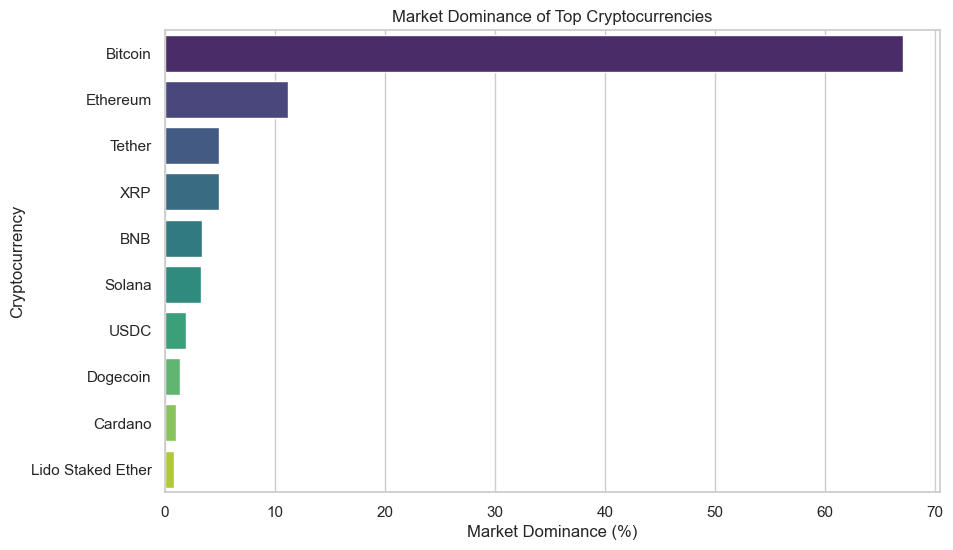

/Users/taylormcwilliam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/taylormcwilliam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/taylormcwilliam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


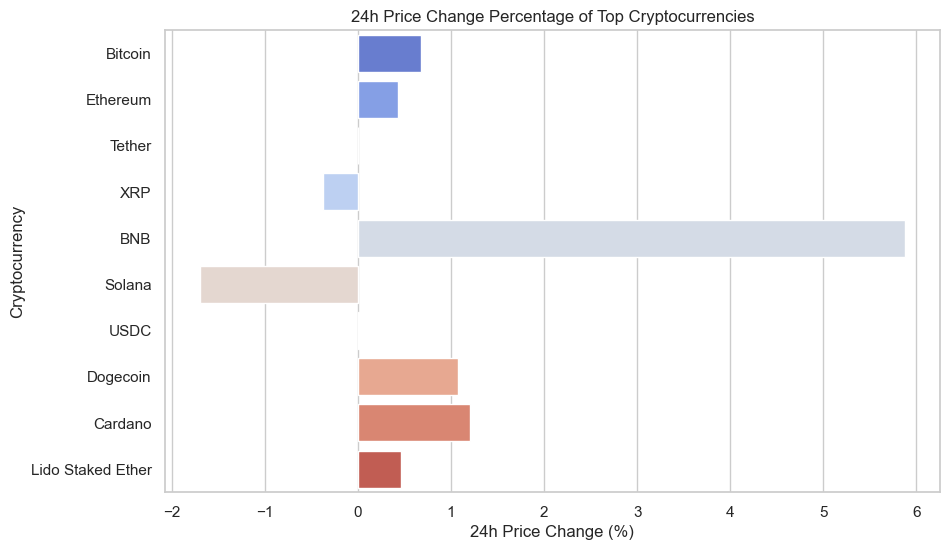

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plot market dominance
plt.figure(figsize=(10, 6))
sns.barplot(x='market_dominance', y='name', data=processed_df, palette='viridis')
plt.title('Market Dominance of Top Cryptocurrencies')
plt.xlabel('Market Dominance (%)')
plt.ylabel('Cryptocurrency')
plt.show()

# Plot 24h price change percentage
plt.figure(figsize=(10, 6))
sns.barplot(x='price_change_percentage_24h', y='name', data=processed_df, palette='coolwarm')
plt.title('24h Price Change Percentage of Top Cryptocurrencies')
plt.xlabel('24h Price Change (%)')
plt.ylabel('Cryptocurrency')
plt.show()

In [6]:
# Save processed data to a Parquet file
processed_df.to_parquet('top_cryptocurrencies_market_data.parquet', index=False)
print("Data saved to Parquet file.")

Data saved to Parquet file.


/Users/taylormcwilliam/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


In [ ]:
""" push to snowflake: 
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

# Snowflake connection details
conn = snowflake.connector.connect(
    user='your_username',
    password='your_password',
    account='your_account',
    warehouse='your_warehouse',
    database='your_database',
    schema='your_schema'
)

# Write DataFrame to Snowflake
success, nchunks, nrows, _ = write_pandas(
    conn,
    processed_df,
    table_name='historical_crypto_data',
    database='your_database',
    schema='your_schema'
)

if success:
    print(f"Data uploaded to Snowflake: {nrows} rows inserted.")
else:
    print("Failed to upload data to Snowflake.")

# Close the connection
conn.close()"""